In [8]:
import simexpal
import yaml

cfg = simexpal.config_for_dir()

results = []
for run in cfg.collect_successful_results():
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

for r in sorted(results, key=lambda r: (r['fill_factor'], r['algo'])):
    print('Algorithm {}, fill factor {} takes: {} ms (insert), {} ms (lookup)'.format(
          r['algo'], r['fill_factor'], r['time_insert'], r['time_lookup']))

Algorithm Bucket-Guckoo, fill factor 0.5 takes: 2493 ms (insert), 1226 ms (lookup)
Algorithm chaining, fill factor 0.5 takes: 8754 ms (insert), 1576 ms (lookup)
Algorithm linear, fill factor 0.5 takes: 1465 ms (insert), 876 ms (lookup)
Algorithm quadratic, fill factor 0.5 takes: 1537 ms (insert), 930 ms (lookup)
Algorithm stl, fill factor 0.5 takes: 26880 ms (insert), 6793 ms (lookup)
Algorithm Bucket-Guckoo, fill factor 0.8 takes: 4568 ms (insert), 2238 ms (lookup)
Algorithm chaining, fill factor 0.8 takes: 16361 ms (insert), 3002 ms (lookup)
Algorithm linear, fill factor 0.8 takes: 3319 ms (insert), 1875 ms (lookup)
Algorithm quadratic, fill factor 0.8 takes: 3667 ms (insert), 2137 ms (lookup)
Algorithm stl, fill factor 0.8 takes: 55332 ms (insert), 12448 ms (lookup)
Algorithm Bucket-Guckoo, fill factor 0.9 takes: 5474 ms (insert), 2690 ms (lookup)
Algorithm chaining, fill factor 0.9 takes: 20686 ms (insert), 3630 ms (lookup)
Algorithm linear, fill factor 0.9 takes: 4486 ms (insert),

In [9]:
factors = {}
insertions = {}
lookups = {}
algorithms = set()
for r in sorted(results, key=lambda r: (r['fill_factor'], r['algo'])):
    alg = r['algo']
    if alg not in algorithms:
        algorithms.add(alg)
        factors[alg] = []
        insertions[alg] = []
        lookups[alg] = []
    factors[alg].append(r['fill_factor'])
    insertions[alg].append(r['time_insert'])
    lookups[alg].append(r['time_lookup'])
    

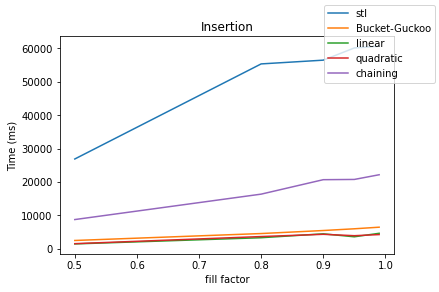

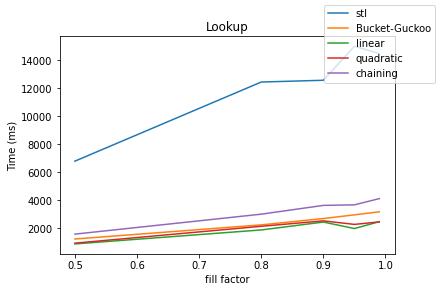

In [7]:
 import matplotlib.pyplot as plt
fig, plts = plt.subplots()
for alg in algorithms:
    plts.plot(factors[alg], insertions[alg])
fig.legend(algorithms)
plts.set_title('Insertion')
plts.set_ylabel('Time (ms)')
plts.set_xlabel('fill factor')
fig.savefig('plot_insertion.png')

fig, plts = plt.subplots()
for alg in algorithms:
    plts.plot(factors[alg], lookups[alg])
fig.legend(algorithms)
plts.set_title('Lookup')
plts.set_ylabel('Time (ms)')
plts.set_xlabel('fill factor')
fig.savefig('plot_lookup.png')